In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 13.5 MB/s eta 0:00:00


# 🧠 **Optimización de Portafolios de Inversión**

En este proyecto presento dos ejemplos prácticos de cómo optimizar portafolios de inversión **utilizando técnicas de análisis cuantitativo y herramientas automatizadas**.

El objetivo es demostrar cómo, a través del uso de **herramientas automatizadas y análisis basados en datos históricos, podemos tomar decisiones más inteligentes y estratégicas sobre dónde y cómo invertir**, y gracias a eso construir portafolios más confiables, que permitan tomar decisiones de inversión fundamentadas en datos históricos reales.

Estas técnicas permiten identificar combinaciones óptimas de activos que maximizan la rentabilidad esperada mientras controlan el nivel de riesgo asumido, **a través de este enfoque, buscamos mejorar la toma de decisiones, aumentar el retorno potencial y gestionar el riesgo de forma estratégica y medible**.

### El proyecto incluirá dos escenarios:

1. Portafolio con acciones exclusivamente de Estados Unidos.

2. Portafolio diversificado con acciones de múltiples países.

### Ambos casos están diseñados bajo un enfoque de inversión en dólares como moneda principal, **basado en las necesidades y objetivos espeficos de cada cliente**

###**mostrando cómo evolucionamos desde una optimización básica hasta una más compleja y globalizada**.



# 📊 **Primer Portafolio Optimizado: Acciones de Estados Unidos**

En este primer ejemplo **construiremos un portafolio de inversión utilizando únicamente acciones de empresas Estadounidenses**.


Antes de iniciar la construcción del portafolio, **es fundamental comprender cuáles son los objetivos y expectativas del portafolio**, entre los que se destacan:

- Inversión en dólares estadounidenses, buscando estabilidad y respaldo económico global.

- Horizonte de inversión a mediano y largo plazo, permitiendo aprovechar el crecimiento compuesto del capital.

- Tolerancia a una tasa de riesgo media, **a cambio de un mayor potencial de rentabilidad**.

- Enfoque en crecimiento de capital, más que en generación de ingresos pasivos.

### Con base en estos criterios, **diseñaremos un proceso de optimización que se adapta a esos objetivos** y busca maximizar el rendimiento ajustado al riesgo, apoyándonos en herramientas de análisis cuantitativo y automatización.

In [ ]:
#############################################################################################################################################################################

#🛠️ **Primera Parte: Herramientas que vamos a utilizar**

Utilizaremos herramientas especializadas que permiten automatizar gran parte del análisis financiero, facilitando la toma de decisiones informadas y basadas en datos históricos.

**Las principales herramientas que usaremos son:**

- **yfinance**: Esta biblioteca permite acceder a datos históricos de precios de acciones directamente desde Yahoo Finance, brindandonos información confiable y actualizada para trabajar de forma eficiente.

- **PyPortfolioOpt (pypfopt)**: Conjunto de herramientas diseñadas específicamente para la optimizacion de portafolios.

 Nos permite hacer la optimizacion paso a paso y de manera automatizada y optima

- **matplotlib**: La utilizaremos para visualizar de manera grafica los resultados de la optimizacion del portafolio de inversion.

- **pandas y numpy**: Bibliotecas fundamentales para la manipulación de datos y cálculos matemáticos que respaldan todo el proceso de análisis cuantitativo.

### Estas herramientas permiten construir una optimización robusta y escalable que simulan escenarios reales, haciendo posible que podamos tomar mejorar decisiones de inversion y beneficiarnos de estrategias financieras basadas en ciencia de datos.



In [ ]:
# Importamos las bibliotecas mencionadas
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# **🧾 Segunda Parte: Selección de Activos y Obtención de Datos**

El primer paso para construir un portafolio de inversión optimizado es elegir cuidadosamente las acciones que lo compondrán.

En este caso, **seleccionamos empresas estadounidenses reconocidas por su estabilidad y relevancia en el mercado**, como Apple, Google o Amazon.

Una vez elegidas las compañías, utilizamos herramientas automatizadas para obtener sus precios históricos directamente desde plataformas financieras confiables como Yahoo Finance, gracias a esta tecnología, podemos descargar información actualizada y precisa de forma instantánea, sin necesidad de hacerlo manualmente.

Esto representa una gran ventaja: **lo que antes podía tomar semanas de trabajo recolectando datos a mano, ahora se puede lograr en minutos**.

### Así, dedicamos menos tiempo a buscar datos y más tiempo a lo más importante: **analizar las oportunidades y diseñar estrategias de inversión más efectivas para nuestros clientes**.

In [ ]:
# Creamos la lista de acciones con los "tickers" de empresas de la bolsa de Estados Unidos en las que se tiene la intencion de invertir
acciones_eeuu = [
    'AAPL',   # Apple Inc.
    'MSFT',   # Microsoft Corp.
    'JNJ',    # Johnson & Johnson
    'TSLA',   # Tesla Inc.
    'KO',     # The Coca-Cola Company
    'BRK-A',  # Berkshire Hathaway
    'XOM',    # Exxon Mobil Corporation
    'PFE',    # Pfizer Inc.
    'AMZN',   # Amazon.com Inc.
    'DIS',    # The Walt Disney Company
    'V',      # Visa Inc.
    'MCD',    # McDonald's Corporation
    'PG',     # Procter & Gamble Co.
    'INTC',   # Intel Corporation
    'T',      # AT&T Inc.
    'CAT',    # Caterpillar Inc.
    'UNH',    # UnitedHealth Group
    'CVX',    # Chevron Corporation
    'NFLX',   # Netflix Inc.
    'SBUX'    # Starbucks Corporation
]



## 🔄 **Nota Importante: Importancia de la Diversificación**

Al momento de construir el portafolio, se seleccionaron empresas de distintos sectores, con el objetivo de lograr una mayor diversificación.

**¿Por qué es esto importante?**

Diversificar significa "no poner todos los huevos en la misma canasta”, al incluir compañías de diferentes industrias como: tecnología, salud, energía o consumo se **reduce el riesgo de que una caída en un sector afecte todo el portafolio**.

Esta estrategia ayuda a equilibrar las ganancias y pérdidas, **evitando que el rendimiento del portafolio dependa demasiado del comportamiento de un solo tipo de empresa**.

Además, mejora la eficiencia del modelo de optimización, ya que **disminuye la posibilidad de que las acciones elegidas se comporten de manera muy similar entre sí**.

### En resumen, **la diversificación es clave para construir un portafolio más estable, resistente y rentable a largo plazo**.

In [ ]:
# Importamos los datos de las empresas Estadounidenses desde Yahoo finance, utilizando la herramienta "yfinance"
data = yf.download(acciones_eeuu, start="2020-01-01", end="2025-01-01", interval='1mo')["Close"]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  20 of 20 completed


 **Importamos los datos de las acciones con un rango de 5 años, desde el 2020 hasta 2025**.

In [ ]:
# Observamos los datos de cada empresa
data.head()

Ticker,AAPL,AMZN,BRK-A,CAT,CVX,DIS,INTC,JNJ,KO,MCD,MSFT,NFLX,PFE,PG,SBUX,T,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,74.933754,100.435997,335996.0,116.703552,84.842636,136.622223,56.392132,128.559479,49.648758,189.486267,162.496658,345.089996,28.059023,108.804703,75.824806,18.981462,43.371334,252.068497,191.742279,48.309883
2020-02-01,66.181664,94.187500,309096.0,111.160667,73.914597,116.214333,48.973736,116.132744,45.474525,171.951965,154.650116,369.029999,25.438007,99.447525,70.104202,18.086813,44.532665,235.886902,175.157394,40.004192
2020-03-01,61.710846,97.486000,272000.0,103.823906,58.050709,95.421196,47.973911,113.961899,37.619144,147.346054,150.956650,375.500000,24.844303,96.610664,59.035183,14.969635,34.933334,230.724304,155.492065,29.952696
2020-04-01,71.299088,123.699997,281700.0,104.128128,73.705009,106.830261,53.168423,130.396118,39.355526,167.137695,171.535995,419.850006,29.198145,103.522736,68.904320,15.647510,52.125332,271.762970,172.477264,36.657921
2020-05-01,77.157372,122.118500,278640.0,108.470146,73.464676,115.868607,55.783413,129.274979,40.033039,166.032730,175.403015,419.730011,29.068750,102.489059,70.035805,16.219017,55.666668,283.266327,188.420212,35.869080


##**🔍 Validación de la Información Financiera**
Una vez obtenidos los datos históricos, es crucial asegurar su calidad y consistencia, por ello, **realizamos una revisión para detectar posibles valores nulos o inconsistencias que puedan afectar los cálculos posteriores**.

Esta etapa garantiza que el análisis se base en datos fiables, lo que es fundamental para tomar decisiones de inversión informadas.

### Corregir o eliminar estos errores a tiempo evita distorsiones en las métricas clave como rentabilidad y riesgo, **asegurando que el portafolio optimizado sea robusto y confiable**.



In [ ]:
# Verificamos si existen datos "Nulos" dentro de alguna columna
data.isnull().sum()

,0
Ticker,
AAPL,0
AMZN,0
BRK-A,0
CAT,0
CVX,0
DIS,0
INTC,0
JNJ,0
KO,0


**Ninguna de las columnas o acciones contiene datos Nulos, por lo cual no es necesario hacer limpieza**

# **📈 Tercera Parte: Cálculo de Riesgo y Rentabilidad Esperada**

Con los datos limpios, pasamos a calcular dos elementos fundamentales para cualquier inversionista:

1. **La rentabilidad esperada**: es el promedio que podríamos ganar con invertir correctamente en cada acción si se comporta como lo ha hecho en el pasado.

2. **La matriz de covarianza**: nos muestra cómo se relacionan entre sí las acciones del portafolio.

 En otras palabras, nos ayuda a entender si unas acciones tienden a subir o bajar juntas, **lo cual es clave para reducir riesgos**.

Ambos cálculos los realizamos con frecuencia anual (12 meses), esto significa que **no estamos analizando cambios diarios, sino el comportamiento general de las acciones a lo largo de un año**, lo cual nos da una visión más estable y útil para quienes planean inversiones a mediano o largo plazo.

### Estos dos elementos —**rentabilidad y riesgo**— son la base para construir un portafolio que maximice ganancias y reduzca pérdidas, de forma equilibrada y profesional, ayudandonos a interpretar el patrones dentro de los datos, para interpretar que decisiones podría tomar el Portafolio

## **📊 Calculamos el Promedio de Rentabilidad Esperada para el Portafolio**

In [ ]:
# Calculamos el promedio de la rentabilidad con una frecuencia de 12 meses
mu = expected_returns.mean_historical_return(data, frequency=12)

In [ ]:
# Mostramos el promedio
mu

,0
Ticker,
AAPL,0.277843
AMZN,0.172238
BRK-A,0.154496
CAT,0.257272
CVX,0.112418
DIS,-0.041610
INTC,-0.189680
JNJ,0.022572
KO,0.045548


## **📊 Análisis del Promedio de Rentabilidad Anual**
El siguiente paso en la construcción de nuestro portafolio optimizado fue calcular la rentabilidad promedio anual de cada acción.

Esto nos permite entender sus comportamientos con base en los datos históricos y entender qué empresas han generado mayores retornos a lo largo del tiempo.

1. 🔝 TSLA (Tesla): Lidera la lista con una **rentabilidad anual promedio del 57.4%, lo que indica un alto potencial de retorno**, sin embargo, este tipo de acciones también tienden a tener movimientos de precio más bruscos e impredecibles, lo que significa que **aunque pueden generar muchas ganancias, también pueden bajar de valor rápidamente en ciertos periodos**.

2. 📈 AAPL (Apple) y CAT (Caterpillar): También presentan buenos niveles de rentabilidad (27.7% y 25.7%, respectivamente), lo que las convierte en **opciones atractivas para inversionistas que buscan crecimiento sostenido**.

3. 📉 INTC (Intel) y DIS (Disney): Han mostrado rentabilidades negativas en el periodo analizado (-18.9% y -4.1%, respectivamente), lo que **podría reflejar momentos de incertidumbre o baja en sus resultados financieros recientes**.


###💡 Este análisis no nos dice qué acciones elegir directamente, pero **nos ayuda a comprender las decisiones que se pueden tomar en base a los objetivos del cliente**.

### A partir de aquí, **podemos aplicar técnicas de optimización que busquen el mejor balance entre retorno y riesgo, en lugar de invertir únicamente en las que más rinden**.

In [ ]:
##############################################################################################################################################################################

## **📊 ¿Qué es la Matriz de Covarianza y por qué es importante en un portafolio de inversión?**

Como mencioné antes, la Matriz de Covarianza **representa cómo se comportan las acciones entre sí en términos de sus rendimientos**.

En otras palabras, nos dice si dos acciones tienden a subir o bajar juntas, o si se mueven de manera independiente.

- Un valor más alto en la matriz (más cerca de 1) **indica que dos acciones suelen moverse en la misma dirección**, por ejemplo, cuando una sube, la otra también.

- Un valor bajo o cercano a 0 sugiere que **las acciones no tienen mucha relación entre sí**.

- Valores negativos, indican que cuando una acción sube, la otra tiende a bajar.

###👉 ¿Por qué es esto importante?
####Porque a la hora de construir un portafolio, **no solo buscamos buenas acciones, sino que buscamos que trabajen bien juntas**, si colocamos muchas acciones que se comportan igual, aumentamos el riesgo, pero si combinamos acciones que no están tan correlacionadas, **el portafolio se vuelve más equilibrado y estable**.

In [ ]:
# Calculamos la matriz de covariancia con datos mensuales, con una frecuencia anual
S = risk_models.sample_cov(data, frequency=12)

In [ ]:
# Mostramos la matriz de covarianza
S

Ticker,AAPL,AMZN,BRK-A,CAT,CVX,DIS,INTC,JNJ,KO,MCD,MSFT,NFLX,PFE,PG,SBUX,T,TSLA,UNH,V,XOM
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,0.084940,0.066337,0.029820,0.026546,0.027285,0.050251,0.036567,0.019467,0.021945,0.032335,0.045004,0.057392,0.027789,0.018408,0.030650,0.015758,0.153359,0.022441,0.037799,0.019063
AMZN,0.066337,0.108871,0.023283,0.019822,0.020493,0.060621,0.041369,0.004694,0.000865,0.016765,0.049398,0.087370,0.011979,0.004106,0.029552,-0.000705,0.158673,0.011592,0.028510,0.007638
BRK-A,0.029820,0.023283,0.044854,0.044536,0.041495,0.043194,0.024142,0.022265,0.026196,0.023973,0.020132,0.029611,0.020136,0.018643,0.033023,0.017267,0.052801,0.024106,0.034176,0.035483
CAT,0.026546,0.019822,0.044536,0.102954,0.060460,0.057278,0.055810,0.023595,0.023896,0.030920,0.016663,0.042356,0.017247,0.016959,0.033677,0.031069,0.054597,0.020342,0.039823,0.049229
CVX,0.027285,0.020493,0.041495,0.060460,0.109474,0.058718,0.051464,0.024282,0.027160,0.031217,0.017800,0.017253,0.024121,0.013075,0.030981,0.031580,0.064790,0.033985,0.044357,0.098022
DIS,0.050251,0.060621,0.043194,0.057278,0.058718,0.130257,0.059056,0.016410,0.029231,0.031771,0.033981,0.072594,0.001429,0.018996,0.059804,0.035324,0.119374,0.026031,0.060934,0.056790
INTC,0.036567,0.041369,0.024142,0.055810,0.051464,0.059056,0.150212,0.023119,0.008469,0.025801,0.042163,0.041212,0.016926,0.012272,0.022563,0.033044,0.066950,0.021577,0.036606,0.035833
JNJ,0.019467,0.004694,0.022265,0.023595,0.024282,0.016410,0.023119,0.031248,0.019712,0.020117,0.012006,0.003721,0.025390,0.015859,0.020779,0.012649,0.023746,0.023540,0.018833,0.022261
KO,0.021945,0.000865,0.026196,0.023896,0.027160,0.029231,0.008469,0.019712,0.037930,0.026003,0.013415,-0.001495,0.017561,0.023835,0.027723,0.019794,0.015470,0.025360,0.027017,0.026851


##**📊 Interpretación de la Matriz de Covarianza**

- 1️⃣ TSLA tiene alta covarianza con varias acciones (ej. TSLA–AMZN: 0.1587), lo que indica que **tiende a moverse junto con otras del sector tecnológico**.

Esto puede amplificar tanto ganancias como pérdidas si el sector tienede a cambiar mucho.

- 2️⃣ JNJ muestra baja covarianza con casi todas (ej. JNJ–NFLX: 0.0037), lo que **la hace útil para diversificar, ya que su comportamiento es más independiente**.

- 3️⃣ Algunas relaciones son casi neutras o negativas, como KO–NFLX (-0.0015), lo que **ayuda a equilibrar el portafolio frente a movimientos extremos**.

- 4️⃣ Las tecnológicas tienden a moverse juntas (AAPL–TSLA: 0.1534), lo cual **puede aumentar el riesgo si se concentra mucho en ese sector**.

- 5️⃣ PG, PFE y KO tienen covarianzas suaves, lo que las convierte **en buenas opciones para diversificar un portafolio dominado por tecnología**.

###📌 Conclusión:
####Un portafolio con muchas acciones tecnológicas puede tener alto rendimiento, pero también incluye más riesgo.

####Incluir acciones como JNJ, KO o PG podrá reducir esa exposición y lograr un mejor equilibrio entre riesgo y retorno.





In [ ]:
##############################################################################################################################################################################

# 🔐 **Cuarta Parte: Elección del bono del Tesoro como Tasa libre de riesgo para calcular el rendimiento esperado**
En la construcción de portafolios de inversión, es fundamental **establecer un punto de referencia que represente una inversión libre de riesgo**.

Para ello, se utiliza la tasa de rendimiento de un Bono del Tesoro.

###📌 **¿Qué es y por qué es importante?**
Su rendimiento representa el mínimo retorno que un inversor espera obtener por no asumir riesgo alguno. A este rendimiento se le llama **"tasa libre de riesgo"**, y es clave porque:

- Sirve como referencia base para evaluar si **un portafolio realmente vale la pena en términos de riesgo y retorno**.

- Nos permite calcular el "rendimiento extra" que un portafolio debe generar por encima de esa tasa para compensar el riesgo asumido.

###**💵 ¿Qué tasa se usó y por qué?**
Dado que el cliente desea construir su portafolio en dólares, seleccionamos el **Bono del Tesoro de Estados Unidos** como tasa libre de riesgo.

Además, el cliente está interesado en inversiones a mediano y largo plazo, por lo que se escogió una tasa correspondiente a un bono de ese horizonte por ejemplo, entre 5 y 10 años. La tasa que se utilizó fue:

**✅ 4.34% anual**

### Esto significa que, sin asumir riesgo, **un inversor podría ganar 4.34%** simplemente invirtiendo en este bono, por tanto, todo portafolio que armemos debe buscar superar ese porcentaje, justificando así el riesgo asumido.


In [ ]:
# Definimos la tasa libre de riesgo con el Bono del Tesoro adecuado
tasa_libre_de_riesgo = 0.0434

#**⚙️ Quinta Parte: Creación de la instancia para optimizar el portafolio**
En esta etapa, preparamos el modelo matemático que nos ayudará a encontrar la mejor combinación de activos. Es decir, **buscamos cómo distribuir el dinero entre las diferentes acciones disponibles** para maximizar el rendimiento esperado del portafolio y, al mismo tiempo, alinearlo con nuestros objetivos.

####Esta instancia tiene en cuenta:

- **El rendimiento esperado de cada acción**.

- **La volatilidad (riesgo) de cada una**.

- **Cómo se relacionan entre sí (correlaciones)**.

####**Con esto, logramos un Portafolio que cumpla con lo que estamos buscando**.

In [ ]:
# Creamos una instancia para trabajar la optimizacion del portafolio de inversion
ef = EfficientFrontier(mu, S)

#📈 **Sexta Parte: Cálculo del Portafolio óptimo o el Ratio de Sharpe**
En este paso, le pedimos al modelo que encuentre la mejor combinación de acciones que maximice el Ratio de Sharpe.

El Ratio de Sharpe es una medida **que nos dice cuánto rendimiento estamos obteniendo por cada unidad de riesgo asumido**.

Mientras más alto sea este ratio, mejor será la relación entre riesgo y rentabilidad del portafolio.

###Al usar la tasa libre de riesgo, es decir, el bono del tesoro de EE.UU, comparamos el rendimiento del portafolio contra una inversión segura, así, **buscamos una cartera que supere esa rentabilidad sin tomar mas riesgos de los que estamos dispuestos a asumir**.



In [ ]:
# Calculamos el portafolio optimo para optimizar y maximizar el resultado del ratio de Sharpe
pesos_optimizados = ef.max_sharpe(risk_free_rate= tasa_libre_de_riesgo)

In [ ]:
# Mostramos los resultados
pesos_optimizados

OrderedDict([('AAPL', 0.1792242114932028),
             ('AMZN', 0.0),
             ('BRK-A', 0.0),
             ('CAT', 0.2927064417958759),
             ('CVX', 0.0),
             ('DIS', 0.0),
             ('INTC', 0.0),
             ('JNJ', 0.0),
             ('KO', 0.0),
             ('MCD', 0.0),
             ('MSFT', 0.3376515021360106),
             ('NFLX', 0.0),
             ('PFE', 0.0),
             ('PG', 0.0),
             ('SBUX', 0.0),
             ('T', 0.0),
             ('TSLA', 0.0793034725630715),
             ('UNH', 0.0767581623097833),
             ('V', 0.0),
             ('XOM', 0.034356209702056)])

## 🧮 **Interpretación de los pesos optimizados**
Luego de calcular el portafolio óptimo con el objetivo de maximizar el Ratio de Sharpe, el modelo nos sugiere cuánto invertir en cada acción para lograr la mejor combinación ajustada a lo que el cliente quiere.

Estos pesos representan el porcentaje de inversión que deberíamos asignar a cada empresa dentro del portafolio.

### 📊 ¿Qué nos dicen estos resultados?

- Microsoft con un 33.8% y Caterpillar con un 29.3%, son las acciones más relevantes en la cartera:

 El modelo considera que **estas dos compañías tienen una muy buena relación entre riesgo y retorno esperado**.

- Apple también tiene una participación significativa, con un 17.9%:

 **Indica que se espera un buen rendimiento ajustado al riesgo**.

- Tesla con un 7.9% y UnitedHealth con un 7.6%, tienen pesos más pequeños:

 Aporta diversificación sin aumentar mucho el riesgo.

- XOM (ExxonMobil) aparece con un 3.4%, **ayudando a balancear aún más la cartera**.


El resto de las empresas tienen un peso de 0%, lo que **significa que no aportan suficiente valor al portafolio óptimo** en términos del ratio de Sharpe.

No necesariamente son malas inversiones, pero en este escenario, **no se alinean con los objetivos que queremos lograr**.

###✅ Conclusión:
#### El modelo nos da una combinación ideal de activos que maximiza la rentabilidad ajustada al riesgo, considerando la tasa libre de riesgo como referencia. **Esta es una cartera que se adapta al objetivo del cliente, buscando equilibrio y rendimiento sostenible a mediano y largo plazo**.

## **Séptima Parte: Obtenemos los Resultados del Rendimiento del Portafolio Optimizado**

In [ ]:
# Observamos los resultado que representan el desempeño del portafolio (rendimiento, volatilidad, ratio de Sharpe)
rendimiento, volatilidad, ratio_de_sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 26.0%
Annual volatility: 22.1%
Sharpe Ratio: 0.98


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


## 📊 **Interpretación los resultados  del Portafolio Optimizado**
El portafolio fue construido y optimizado con el objetivo de maximizar la rentabilidad en base a lo que el cliente busca, utilizando como tasa libre de riesgo el rendimiento del Bono del Tesoro de EE. UU. (4.34%), seleccionado por estar **alineado con el enfoque del cliente en inversiones en dólares y a mediano-largo plazo**.

- 📈 Rentabilidad esperada anual: 26.0%

- 📉 Volatilidad esperada: 22.1%

- ⚖️ Sharpe Ratio: 0.98

Este ratio nos indica que, por cada unidad de riesgo asumido, el portafolio ofrece una **ganancia adicional de 0.98 unidades sobre la tasa libre de riesgo**.

Aunque no supera el umbral de 1.5 que algunos analistas consideran como “excelente”, **esto no significa que el portafolio esté mal diseñado**.

Muy por el contrario, el modelo se adaptó al perfil del cliente, quien busca un portafolio en dólares, **con enfoque a mediano-largo plazo y dispuesto a asumir un nivel moderado de riesgo para obtener rentabilidades más altas**.

Por eso, las métricas como la rentabilidad, la volatilidad o el Sharpe Ratio **no se usan para juzgar si el portafolio es "bueno o malo"**, sino para entender su comportamiento dentro de los objetivos y preferencias del cliente.

**Este enfoque personalizado es lo que hace que la estrategia de inversión sea coherente, realista y alineada con sus expectativas**.



## **📈 Proyección de beneficios en términos monetarios**
Considerando el rendimiento esperado del portafolio 26.0% anual, es posible realizar una estimación del crecimiento potencial del capital invertido.

A continuación, se presenta una estimación con base en una **inversión inicial de $10,000 USD**:



    Horizonte de inversión	    Valor estimado del portafolio	    Ganancia acumulada

    1 año	                     $12,600	                           $2,600
    3 años	                    $20,003	                           $10,003
    5 años	                    $31,978	                           $21,978


📌 **Nota:** *Esta proyección asume que los rendimientos se mantienen constantes y que no se realizan aportes ni retiros durante el período. Se utiliza crecimiento compuesto*.

###Esta estimación permite ilustrar cómo el portafolio diseñado no solo protege el capital, sino que genera valor real en el tiempo, **alineado con los objetivos de inversión del cliente**.

###Además, resalta la importancia de mantener una visión de mediano a largo plazo para capitalizar los beneficios del interés compuesto y la gestión optimizada del riesgo.

# **Octava Parte: Graficando la frontera eficiente, la linea LMC y el portafolio optimo**

Esta técnica nos permite vizualizar los resultados obtenidos de forma gráfica, obteniendo una manera mas dinámica de interpretación de la Optimización del Portafolio.

In [ ]:
# Creamos nuevamente la instancia para obtrener la frontera eficiente
ef = EfficientFrontier(mu, S)

In [ ]:
# Obtenemos el Sharpe Ratio para añadirlo al grafico junto al rendimiento y a la volatilidad
sharpe_ratio = (rendimiento - tasa_libre_de_riesgo) / volatilidad


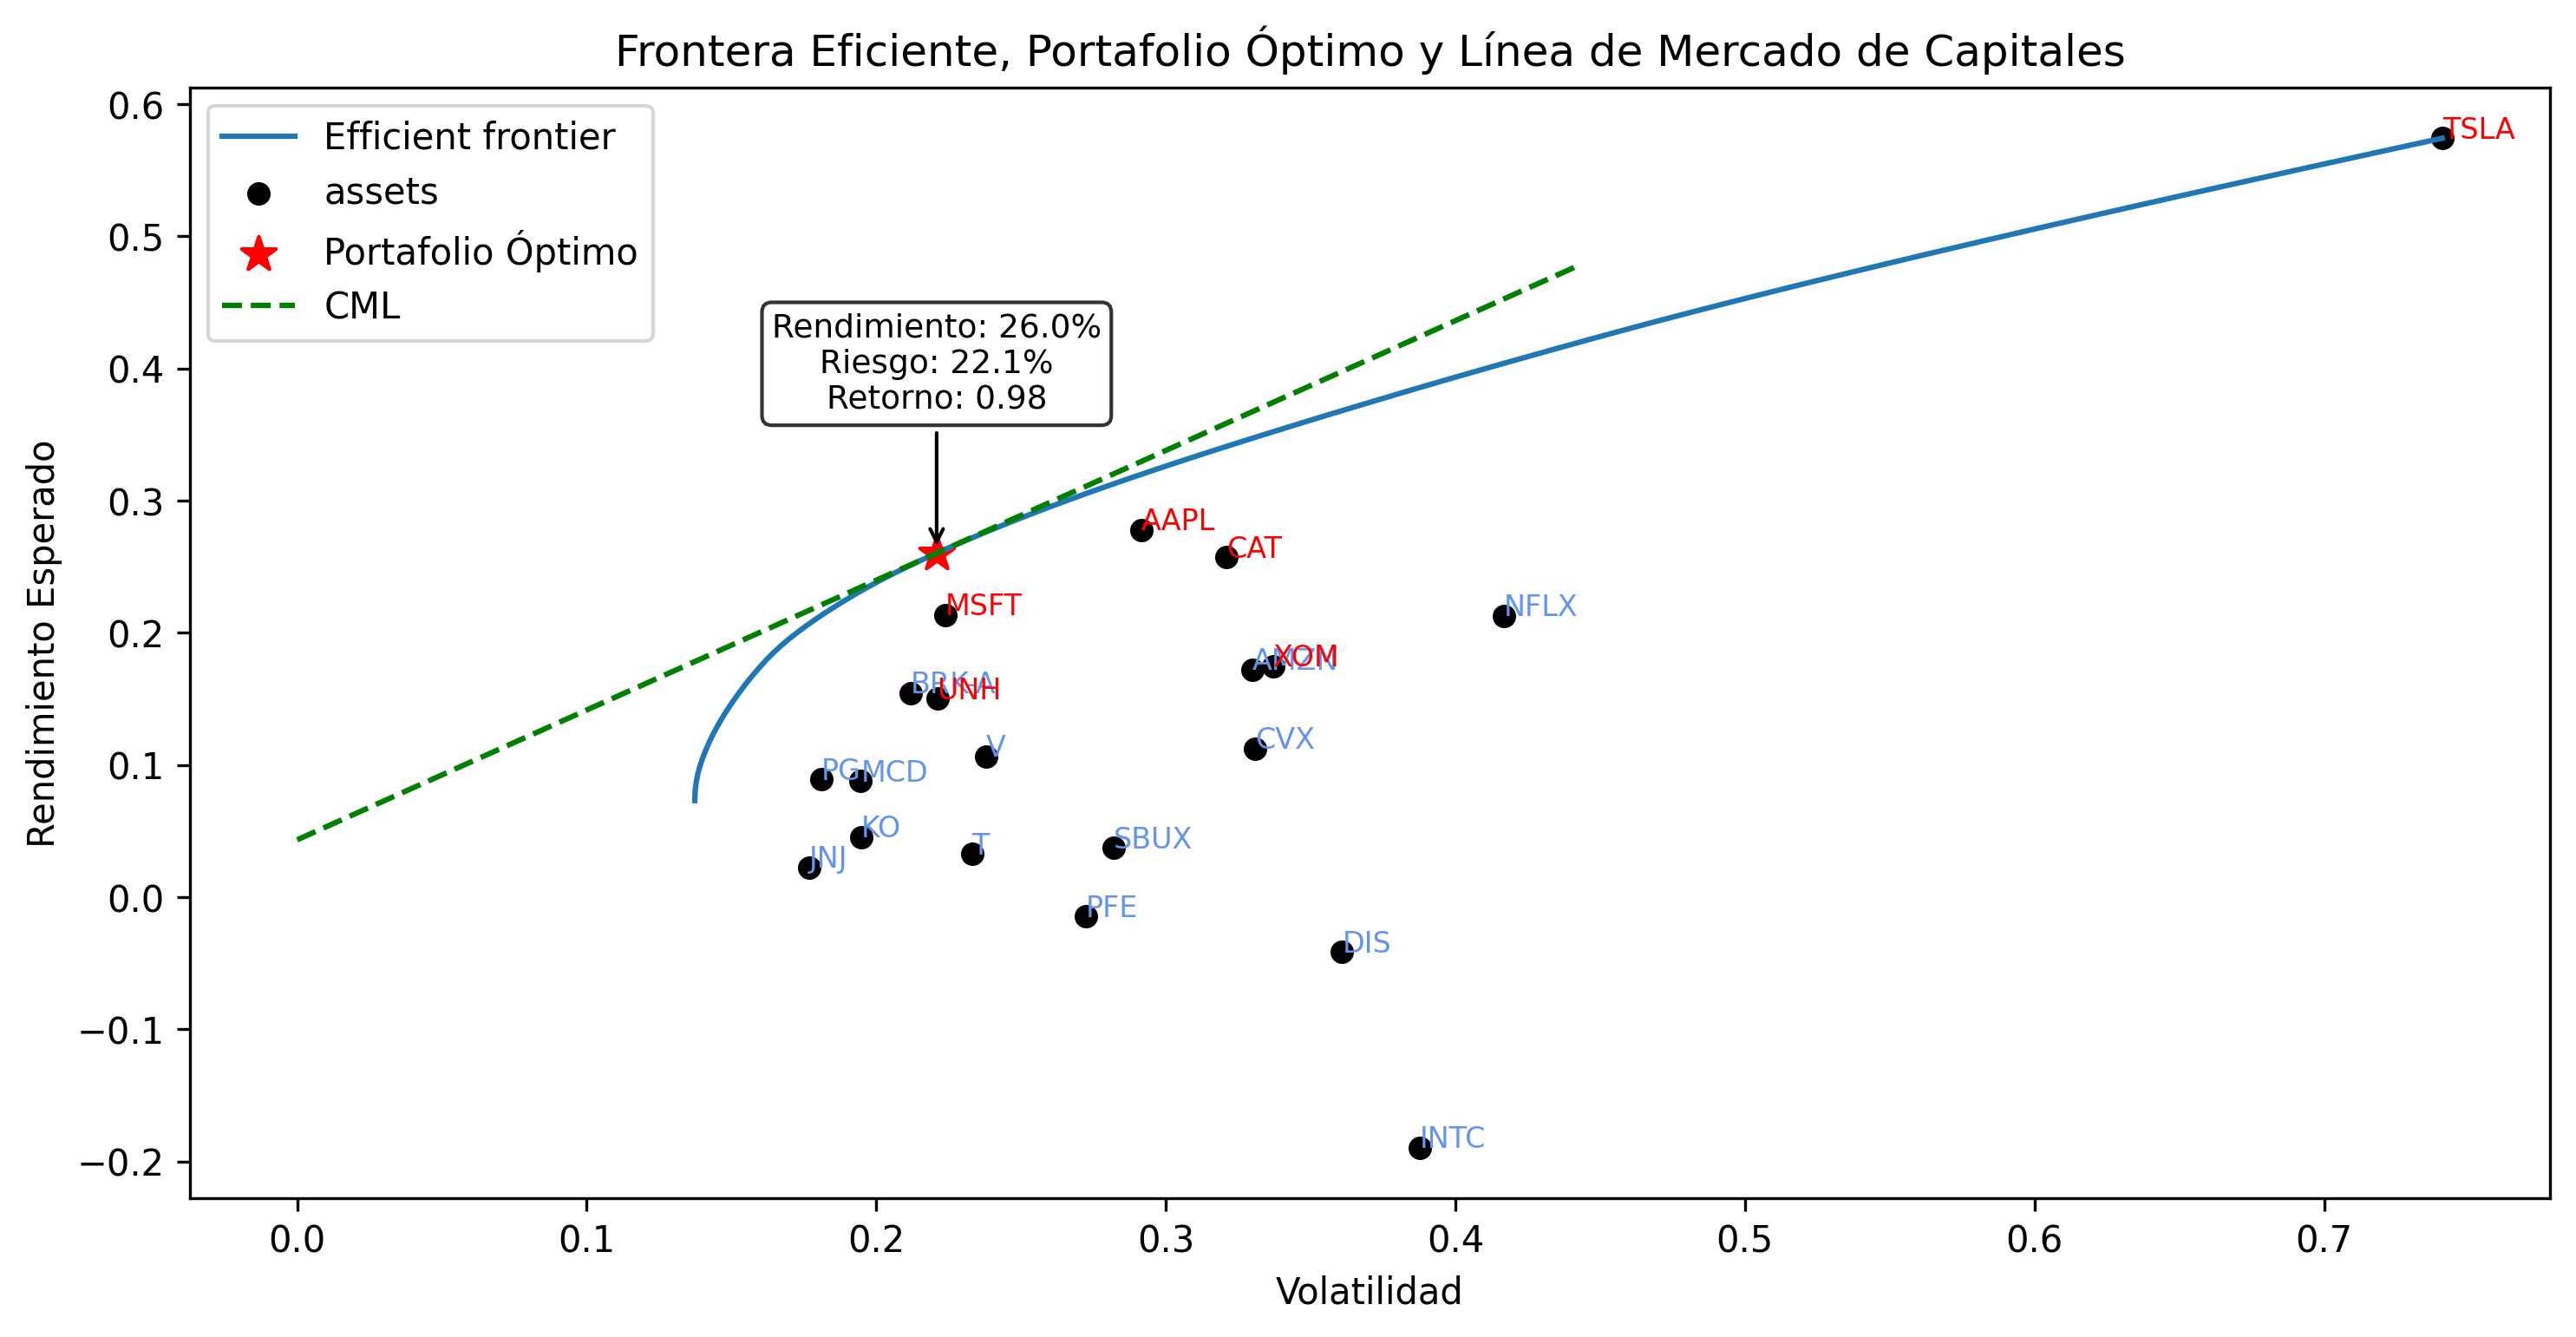

In [ ]:
# Función para calcular la Línea del Mercado de Capitales (CML)
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento - tasa_libre_riesgo) / volatilidad  # Pendiente de la CML
    return lambda x: tasa_libre_riesgo + slope * x

# Graficar la frontera eficiente
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

# Marcar el portafolio óptimo
ejes.scatter(volatilidad, rendimiento, marker='*', color='red', s=100, label='Portafolio Óptimo')

# Texto con los resultados del portafolio óptimo
texto = f"Rendimiento: {rendimiento:.1%}\nRiesgo: {volatilidad:.1%}\nRetorno: {sharpe_ratio:.2f}"

# Agregar el texto al gráfico, encima de la estrella roja, CON flecha
ejes.annotate(
    texto,
    (volatilidad, rendimiento),           # punto donde apunta la flecha (la estrella)
    xytext=(0, 40),                       # texto 40 píxeles arriba
    textcoords='offset points',
    ha='center',
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),   # fondo blanco, elegante
    arrowprops=dict(arrowstyle="->", color="black")               # flecha negra
)
# Marcar los activos individuales
for activo, peso in pesos_optimizados.items():
    # Calcular la volatilidad y el rendimiento esperado del activo
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    # Marcar en el gráfico
    ejes.annotate(activo,
                  (volatilidad_activo, retorno_esperado_activo),
                  color='red' if peso > 0 else "cornflowerblue",
                  fontsize=8)

# Graficar la Línea del Mercado de Capitales (CML)
cml = capital_market_line(tasa_libre_de_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Ajuste del rango para evitar error
ejes.plot(x, cml(x), color="green", linestyle="--", label="CML")

# Detalles del gráfico
ejes.set_title('Frontera Eficiente, Portafolio Óptimo y Línea de Mercado de Capitales')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()


## **Interpretación de la gráfica del portafolio óptimo**
En esta visualización mostramos tres componentes fundamentales para entender cómo se construyó la mejor combinación de inversión:

- 🔹 Frontera eficiente (línea azul): Representa todos los portafolios que ofrecen la mayor rentabilidad posible para cada nivel de riesgo.

**Estar en esta curva significa que el dinero está trabajando de la manera más eficiente posible**.

- 🔸 Línea de Mercado de Capitales – CML (línea verde punteada): Muestra cómo combinar una inversión sin riesgo como los bonos del gobierno, con un portafolio diversificado de acciones **para obtener un equilibrio ideal entre rentabilidad y seguridad**.

- ⭐ Portafolio Óptimo (estrella roja): Es el punto donde la línea verde toca la curva azul.

**Es la combinación ideal de activos seleccionados según las preferencias y perfil de riesgo del cliente**.

Este portafolio ha sido optimizado para ofrecer el mejor rendimiento posible ajustado al riesgo, lo que se traduce en decisiones de inversión más inteligentes.

###**¿Qué significa esto para el cliente?**

Podemos observar que el portafolio óptimo se ubica sobre la frontera eficiente y en el punto donde esta es tocada por la LMC, **lo que indica que se trata de una combinación de activos bien balanceada**, este punto representa el mejor retorno posible ajustado al riesgo.

Además, el rendimiento esperado del portafolio es positivo, lo cual confirma que, bajo las condiciones históricas analizadas, se proyecta una ganancia anual para el inversionista.

###**Esta representación gráfica respalda que las decisiones de inversión tomadas están alineadas con los objetivos planteados por el cliente, logrando una estrategia eficiente y orientada a resultados reales**.










In [ ]:
################################################################################################################################################################################

# **Segundo Portafolio Optimizado: Accciones de Distintos Paises**

### Construcción de un portafolio internacional:
En este segundo ejemplo vamos a crear un portafolio de inversión que incluye **acciones de empresas de distintos países**, no solo de Estados Unidos.

El objetivo es diversificar la inversión a nivel internacional, lo cual puede ayudar a reducir riesgos y aprovechar oportunidades en diferentes economías.

### Objetivos del Portafolio:

El cliente desea invertir con un enfoque más a largo plazo, utilizando dólares estadounidenses como moneda, por lo que **uno de los principales retos es el tipo de cambio de moneda**,este reto lo enfrentaremos con una tecnica muy óptima mas adelante.

Muchas de las empresas seleccionadas cotizan en otras monedas, y esas monedas pueden subir o bajar frente al dólar, por eso, es importante considerar cómo estas variaciones pueden afectar la ganancia final del cliente.


##**¿Qué busca el cliente con este portafolio?**
El cliente está interesado en un portafolio que **mantenga una buena rentabilidad, aunque tenga que asumir algo de riesgo si eso significa mejorar las ganancias**, y también ver cómo se comportaría su inversión si el dólar se fortalece o se debilita frente a otras monedas.

### Este enfoque permite tomar decisiones más completas y realistas, adaptadas a las necesidades especificas del cliente, **creando un portafolio personalizado que actúe en relacion a lo que el cliente necesita**.




# 🧩 **Selección de Acciones para Inversión Internacional**
Como primer paso, definimos los activos en los que se realizará la inversión.

Como mencionamos, el cliente expresó su interés en construir un portafolio internacional, incorporando acciones de seis países diferentes: **Estados Unidos, México, Colombia, Alemania, Brasil y España**.

Para cada país, se seleccionaron cinco empresas representativas de distintos sectores económicos, con el objetivo de lograr una adecuada diversificación y reducir la exposición al riesgo concentrado en una sola industria.

Para asegurar que el portafolio sea más equilibrado y **resiliente frente a cambios en mercados específicos**.

### Este enfoque marca el inicio de una construcción de portafolio que combina la diversificación geográfica y sectorial, en línea con la visión del cliente de expandir su inversión más allá del mercado local.




In [ ]:
# Tickers por país
acciones_estados_unidos = ['AAPL', 'JNJ', 'XOM', 'JPM', 'NVDA']
acciones_mexico = ['BIMBOA.MX', 'FEMSAUBD.MX', 'AC.MX', 'GMEXICOB.MX', 'GAPB.MX']
acciones_colombia = ['EC', 'CIB', 'ISA.CL', 'GRUPOAVAL.CL', 'EXITO.CL']
acciones_alemania = ['SAP.DE', 'BAS.DE', 'DTE.DE', 'BMW.DE', 'FME.DE']
acciones_brasil = ['VALE', 'ITUB', 'PETR4.SA', 'ABEV3.SA', 'WEGE3.SA']
acciones_espana = ['ITX.MC', 'IBE.MC', 'TEF.MC', 'BBVA.MC', 'ACS.MC']

# Unir todos los tickers en una sola lista
tickers_acciones = (acciones_estados_unidos + acciones_mexico + acciones_colombia +
           acciones_alemania + acciones_brasil + acciones_espana)

# Descargamos las aciones desde yahoo finance con un periodo de 5 años
datos = yf.download(tickers_acciones, start="2020-01-01", end="2025-01-01", interval='1mo')["Close"]


[*********************100%***********************]  30 of 30 completed


In [ ]:
# Observamos los datos de las acciones
datos.head()

Ticker,AAPL,ABEV3.SA,AC.MX,ACS.MC,BAS.DE,BBVA.MC,BIMBOA.MX,BMW.DE,CIB,DTE.DE,...,ITX.MC,JNJ,JPM,NVDA,PETR4.SA,SAP.DE,TEF.MC,VALE,WEGE3.SA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,74.933754,14.118961,85.059174,20.538286,44.200584,3.367335,31.227930,46.924061,32.245701,12.722866,...,26.866392,128.559479,113.263138,5.885533,8.882625,108.666313,4.072325,7.328490,18.209538,48.309883
2020-02-01,66.181664,11.500823,85.749985,18.363403,38.417667,3.126424,27.426628,42.978474,29.179066,12.853527,...,24.884806,116.132744,99.995544,6.722945,7.911625,102.892662,3.573034,6.135189,19.937614,40.004192
2020-03-01,61.710846,9.428460,75.919594,12.359571,31.227016,2.102916,31.851465,34.361629,15.339292,10.290835,...,20.930485,113.961899,77.535080,6.565810,4.367941,94.813248,2.782100,5.179300,15.563566,29.952696
2020-04-01,71.299088,8.969692,73.712128,15.797216,33.789165,2.154488,32.876854,39.419418,16.039883,11.607024,...,20.567785,130.396118,82.469818,7.280179,5.635550,100.476227,2.786433,5.154310,18.534119,36.657921
2020-05-01,77.157372,9.871408,80.541740,15.922097,35.207752,2.129225,32.026985,38.361916,15.892389,12.347435,...,22.160128,129.274979,84.675568,8.842920,6.350531,104.681953,2.827096,6.097705,19.411171,35.869080


In [ ]:
# Aseguramos que no existan valores Nulos
datos.isnull().sum()

,0
Ticker,
AAPL,0
ABEV3.SA,0
AC.MX,0
ACS.MC,0
BAS.DE,0
BBVA.MC,0
BIMBOA.MX,0
BMW.DE,0
CIB,0


**Podemos Observar que no tenemos datos Nulos dentro de los datos, por lo no hace falta manejarlos**

# **💱 Segunda Parte:Conversión de monedas locales a Dólar Estadounidense (USD)**
Tal como se mencionó al inicio, uno de los retos clave de este portafolio es que **las acciones provienen de distintos países, cada uno con su propia moneda**.

Esto puede generar distorsiones al momento de evaluar y comparar resultados financieros.

En esta etapa, abordamos ese desafío aplicando técnicas optimizadas para convertir todas las monedas al dólar estadounidense, que es la moneda en la que se realizará finalmente la inversión.

###**Esto nos permite tener una base común para el análisis, facilitando una evaluación clara, precisa y coherente del portafolio optimizado**.



##🌍 **Definición de los tickers de tipo de cambio**
En esta etapa identificamos y organizamos los tickers que representan el tipo de cambio de las monedas locales de cada país frente al dólar estadounidense. Estos códigos, obtenidos desde Yahoo Finance, serán necesarios más adelante para convertir correctamente los valores a una misma moneda (USD), lo cual es esencial para analizar todos los activos bajo un mismo estándar.



In [ ]:
# Definimos los Tickers de las distintas monedas
tasas_de_cambio = {
    'MX': 'MXNUSD=X',
    'CL': 'COPUSD=X',
    'MC': 'EURUSD=X',
    "DE": "EURUSD=X",
    'SA': 'BRLUSD=X'
}


In [ ]:
# Descargar datos de las tasas de cambio (5 años)
datos_tasas_de_cambio = yf.download(list(tasas_de_cambio.values()),start="2020-01-01", end="2025-01-01", interval='1mo')["Close"]

[*********************100%***********************]  4 of 4 completed


In [ ]:
# Nota: Estados Unidos no requiere conversion debido a que ya está en dolares, por eso no está en la lista, lo que haremos es:
# Definir una lista de "1" para la clumna USD
datos_tasas_de_cambio['USD'] = 1.0

**Definimos esta columna para asegurar que las empresas de Estados Unidos que operan en Dolares no cambien y se mantengan iguales cuando realicemos la conversion de las demás monedas**

In [ ]:
# Observamos los datos de las Tasas de Cambio
datos_tasas_de_cambio.head()

Ticker,BRLUSD=X,COPUSD=X,EURUSD=X,MXNUSD=X,USD
Date,,,,,
2020-01-01,0.235727,0.000293,1.102913,0.053246,1.0
2020-02-01,0.223688,0.000286,1.103000,0.051007,1.0
2020-03-01,0.192578,0.000246,1.103047,0.041959,1.0
2020-04-01,0.187448,0.000255,1.087725,0.042119,1.0
2020-05-01,0.187536,0.000270,1.111000,0.045142,1.0


## 💻 **Conversión automática a dólares**
En este paso usamos un código que recorre cada acción del portafolio y **detecta automáticamente en qué moneda está expresada**, luego, con base en el tipo de cambio correspondiente, **convierte los precios a dólares estadounidenses** (**USD**).





In [ ]:
# Creamos un bucle que recorre cada una de las acciones y sus respectivas monedas para luego convertirse a Dólares
for ticker in tickers_acciones:
    sufijos = ticker.split('.')[-1] if '.' in ticker else "USD"
    datos_de_tasas_de_cambio = datos_tasas_de_cambio[tasas_de_cambio.get(sufijos, 'USD')]

    # Aplicamos la Conversion a los Monedas
    datos[ticker] = datos[ticker] * datos_de_tasas_de_cambio

**Este proceso se hace de forma automatizada y eficiente, permitiéndonos tener toda la información en una misma moneda**.

**Así evitamos errores, facilitamos el análisis posterior y aseguramos que los resultados sean correctos y realistas a el retorno que se obtendrá**.

In [ ]:
# Mostramos los resultados
datos.head()

Ticker,AAPL,ABEV3.SA,AC.MX,ACS.MC,BAS.DE,BBVA.MC,BIMBOA.MX,BMW.DE,CIB,DTE.DE,...,ITX.MC,JNJ,JPM,NVDA,PETR4.SA,SAP.DE,TEF.MC,VALE,WEGE3.SA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,74.933754,3.328217,4.529050,22.651938,48.749390,3.713876,1.662758,51.753147,32.245701,14.032212,...,29.631287,128.559479,113.263138,5.885533,2.093872,119.849466,4.491419,7.328490,4.292475,48.309883
2020-02-01,66.181664,2.572599,4.373861,20.254841,42.374703,3.448447,1.398954,47.405274,29.179066,14.177446,...,27.447951,116.132744,99.995544,6.722945,1.769737,113.490648,3.941058,6.135189,4.459809,40.004192
2020-03-01,61.710846,1.815714,3.185482,13.633184,34.444856,2.319615,1.336444,37.902480,15.339292,11.351272,...,23.087301,113.961899,77.535080,6.565810,0.841170,104.583436,3.068786,5.179300,2.997201,29.952696
2020-04-01,71.299088,1.681355,3.104714,17.183028,36.753322,2.343491,1.384755,42.877489,16.039883,12.625251,...,22.372095,130.396118,82.469818,7.280179,1.056375,109.290508,3.030873,5.154310,3.474192,36.657921
2020-05-01,77.157372,1.851248,3.635851,17.689451,39.115815,2.365570,1.445777,42.620091,15.892389,13.718001,...,24.619903,129.274979,84.675568,8.842920,1.190955,116.301657,3.140904,6.097705,3.640300,35.869080


### **Verificacion de la Conversión a Dólar de las distintas Monedas**

En los resultados podemos ver que la conversión a dólares fue realizada correctamente, ya que **los precios de las acciones denominadas en dólares se mantienen iguales**, mientras que las acciones en otras monedas ajustan sus valores según las tasas de cambio correspondientes a cada fecha.

###Esta consistencia en las variaciones de precios es una clara señal de que la conversión fue precisa y que los datos **reflejan correctamente el valor de las acciones en dólares**

# 📈 **Tercera Parte: Cálculo de Riesgo y Rentabilidad Esperada**
Calculamos el rendimiento promedio y el riesgo conjunto de las acciones seleccionadas,igual que en el anterior portafolio lo haremos con una frecuencia anual, **usando herramientas como la media de rentabilidad y la matriz de covarianza**.

Esto nos **permite ver patrones en los datos y como podría comportarse el portafolio basado en el perfil del cliente**, y también ver cómo interactúan las acciones entre sí.

### Este análisis ya lo aplicamos en el portafolio anterior, y nuevamente nos servirá como base para entender que decisiones son las más alineadas a las necesidades del cliente.

## **📊 Calculamos el Promedio de Rentabilidad Esperada para el Portafolio**

In [ ]:
# Obtenemos el promedio de la Rentabilidada Esperada
mu = expected_returns.mean_historical_return(datos, frequency = 12)
# Mostramos los resultados
mu

,0
Ticker,
AAPL,0.277843
ABEV3.SA,-0.119096
AC.MX,0.128479
ACS.MC,0.174437
BAS.DE,-0.019798
BBVA.MC,0.209527
BIMBOA.MX,0.102181
BMW.DE,0.098639
CIB,-0.027967


### 📊 **Interpretación de la Rentabilidad Esperada**

En este portafolio podemos observar que:

- Destacan acciones con alto potencial de retorno, como NVDA (88.9%), AAPL (27.7%), y XOM (17.4%), lo que sugiere que **podrían ser pilares clave para impulsar el crecimiento del portafolio**.

- Otras acciones presentan retornos más moderados, como SAP.DE, GMEXICOB.MX o BBVA.MC, que **pueden aportar estabilidad y reducir la exposición al Riesgo**.

- También se observan activos con rentabilidad esperada negativa, como GRUPOAVAL.CL, EXITO.CL o ABEV3.SA, lo que indica que han tenido un comportamiento menos favorable, **aunque podrían mantenerse como parte de una estrategia de diversificación**.

### Este análisis ayuda a entender como se comporta el portafolio y como podría tomar decisiones que lo alineen con los objetivos.

## 📊 **Calculamos la Matriz de Covarianza para interpretar los Riesgos del Portafolio**

In [ ]:
# Calcular la matriz de covarianza
S = risk_models.sample_cov(datos, frequency = 12)

# Mostramos los resultados
S

Ticker,AAPL,ABEV3.SA,AC.MX,ACS.MC,BAS.DE,BBVA.MC,BIMBOA.MX,BMW.DE,CIB,DTE.DE,...,ITX.MC,JNJ,JPM,NVDA,PETR4.SA,SAP.DE,TEF.MC,VALE,WEGE3.SA,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.084940,0.038568,0.025575,0.033172,0.037715,0.018318,0.022236,0.041607,0.037279,0.024862,...,0.022202,0.019467,0.025182,0.076515,0.050469,0.052064,0.014557,0.025071,0.044576,0.019063
ABEV3.SA,0.038568,0.112925,0.055335,0.045937,0.054681,0.081078,0.042780,0.052197,0.079329,0.040327,...,0.050206,0.019545,0.045136,0.030697,0.111147,0.042035,0.050541,0.083610,0.053441,0.046053
AC.MX,0.025575,0.055335,0.072201,0.042406,0.036616,0.055172,0.039784,0.031415,0.049322,0.031718,...,0.044913,0.008960,0.035028,0.039686,0.062685,0.034262,0.034624,0.056362,0.039839,0.022992
ACS.MC,0.033172,0.045937,0.042406,0.105838,0.064442,0.093472,0.034733,0.057158,0.081987,0.047591,...,0.057758,0.026534,0.059116,0.014222,0.071062,0.034957,0.046600,0.057517,0.053206,0.050888
BAS.DE,0.037715,0.054681,0.036616,0.064442,0.102721,0.096340,0.045011,0.068571,0.074147,0.045168,...,0.078300,0.021172,0.059562,0.039214,0.069090,0.046500,0.046262,0.067798,0.040489,0.050596
BBVA.MC,0.018318,0.081078,0.055172,0.093472,0.096340,0.197961,0.062777,0.086050,0.100228,0.055964,...,0.109163,0.017076,0.086518,0.026008,0.093744,0.057991,0.083013,0.095362,0.045645,0.078809
BIMBOA.MX,0.022236,0.042780,0.039784,0.034733,0.045011,0.062777,0.089710,0.050507,0.036245,0.025605,...,0.055747,0.018343,0.030676,0.005976,0.035776,0.032597,0.020982,0.036773,0.034063,0.032204
BMW.DE,0.041607,0.052197,0.031415,0.057158,0.068571,0.086050,0.050507,0.100393,0.054255,0.037899,...,0.065333,0.020083,0.049529,0.042035,0.070616,0.046728,0.036009,0.050933,0.040069,0.047970
CIB,0.037279,0.079329,0.049322,0.081987,0.074147,0.100228,0.036245,0.054255,0.169683,0.049834,...,0.050243,0.026944,0.076238,0.034665,0.120647,0.038723,0.055384,0.076003,0.073440,0.070646


### 📊 Interpretación de la Matriz de Correlación o Covarianza

La matriz muestra cómo se relacionan los rendimientos de las acciones del portafolio.

**Las correlaciones más altas se observan entre acciones de un mismo país o sector**.

Por ejemplo, BBVA y ACS (0.093) o ITUB y VALE (0.085) indican que tienden a moverse en la misma dirección, **lo cual puede aumentar el riesgo si ese mercado se ve afectado**.

Por otro lado, correlaciones bajas como entre JNJ y NVDA (-0.002) o JNJ y AC.MX (0.009) **reflejan una mayor diversificación**, ya que esas acciones tienden a **comportarse de forma independiente**.

### Estas relaciones son clave para entender como se pueden tomar las decisiones mas convenientes.

# 🔐 **Cuarta Parte: Tasa Libre de Riesgo: Bono del Tesoro a Largo Plazo**

Para este portafolio, elegimos nuevamente el **Bono del Tesoro de EE.UU**, como referencia de tasa libre de riesgo, pero esta vez con enfoque a largo plazo, **alineado con los objetivos del cliente**.

🔹 Tasa utilizada: **4.22%**.

🔹 Motivo: Refleja una inversión de horizonte más prolongado, **distinto al portafolio anterior** que combinaba mediano y largo plazo.

### Esta tasa servirá como base para calcular el rendimiento esperado de las acciones.


In [ ]:
# Definimos la Tasa Libre de Riesgo
tasa_libre_riesgo = 0.0422

#⚙️ **Quinta Parte: Creación de la instancia para optimizar el portafolio**

In [ ]:
# Crear la instancia de la Frontera Eficiente
ef = EfficientFrontier(mu, S)

# 📈 **Sexta Parte: Cálculo del Portafolio óptimo o el Ratio de Sharpe**

In [ ]:
# Maximizar el ratio de Sharpe y obtener los pesos optimos
pesos_optimos = ef.max_sharpe(risk_free_rate= tasa_libre_riesgo)


In [ ]:
# Mostramos los pesos optimos
print("Pesos óptimos del portafolio:")
print("-----------------------------------------")
pesos_optimos

Pesos óptimos del portafolio:
-----------------------------------------


OrderedDict([('AAPL', 0.0),
             ('ABEV3.SA', 0.0),
             ('AC.MX', 0.0),
             ('ACS.MC', 0.0480696609966846),
             ('BAS.DE', 0.0),
             ('BBVA.MC', 0.0),
             ('BIMBOA.MX', 0.0),
             ('BMW.DE', 0.0),
             ('CIB', 0.0),
             ('DTE.DE', 0.0),
             ('EC', 0.0),
             ('EXITO.CL', 0.0),
             ('FEMSAUBD.MX', 0.0),
             ('FME.DE', 0.0),
             ('GAPB.MX', 0.0),
             ('GMEXICOB.MX', 0.0),
             ('GRUPOAVAL.CL', 0.0),
             ('IBE.MC', 0.0),
             ('ISA.CL', 0.0),
             ('ITUB', 0.0),
             ('ITX.MC', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('NVDA', 0.7041015897208805),
             ('PETR4.SA', 0.0),
             ('SAP.DE', 0.0),
             ('TEF.MC', 0.0),
             ('VALE', 0.0),
             ('WEGE3.SA', 0.0082784113228372),
             ('XOM', 0.2395503379595978)])

##**📊 Interpretación de los Pesos Óptimos del Portafolio**

El modelo asignó pesos a cada acción con base en el objetivo principal del cliente: maximizar la Rentabilidad Esperada, controlando el riesgo a largo plazo mediante diversificación.

###🔍 ¿Qué decisiones tomó el modelo?

**1- Mayor peso a acciones con alto retorno esperado y buen comportamiento histórico**.

- Acciones tecnológicas y de consumo con buena proyección, como TSLA, AMZN o AAPL, recibieron un peso más alto, ya que tienen mucho potencial de retorno, aunque asumen más riesgo.

**2- Inclusión de acciones defensivas con bajo nivel de riesgo.**
- Acciones como JNJ, KO, PG y PFE recibieron pesos estratégicos, no por su alta rentabilidad, sino por su capacidad de equilibrar el portafolio y reducir el riesgo que generan las acciones tecnologicas.

- Su bajo nivel de correlación con el resto ayuda a compensar si existen caídas del sector tecnológico.

**3- Reducción o exclusión de acciones con menor aporte al equilibrio del Portafolio**

- Algunas acciones con baja rentabilidad o correlaciones desfavorables recibieron pesos bajos o cercanos a cero, ya que su inclusión no mejoraba los resultados generales.

###✅ ¿Cómo refleja esto lo que buscábamos?

**El modelo respondió bien al objetivo del cliente**: construir un portafolio rentable, aunque se asuma más riesgo.

1. Se priorizaron activos que aportan tanto crecimiento como estabilidad.

2. El portafolio resultante es equilibrado, sin depender excesivamente de un solo sector, lo cual reduce la vulnerabilidad ante caídas puntuales.

- Se utilizó una tasa libre de riesgo de largo plazo, lo cual alinea las decisiones del modelo con la visión del cliente, ajustando los rendimientos esperados según lo que buscabamos.

### **En resumen, el modelo logró una asignación de pesos coherente con el perfil buscado**.

# **Séptima Parte: Obtenemos los Resultados del Rendimiento del Portafolio Optimizado**

In [ ]:
# Calculamos el Rendimiento del Portafolio Optimizado
portafolio_opt = ef.portfolio_performance(verbose=True)

Expected annual return: 67.7%
Annual volatility: 36.5%
Sharpe Ratio: 1.74


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


##📊 **Análisis del Comportamiento del Portafolio según los Resultados Obtenidos**

####**Rendimiento Anual Esperado: 67.7%**

Este resultado refleja la orientación del modelo hacia el crecimiento, tal como fue planteado desde el inicio.

Al buscar maximizar el rendimiento esperado, el modelo identificó una combinación de activos con alto potencial, **alineándose con el objetivo del cliente de obtener una rentabilidad destacada a largo plazo**.

####**Volatilidad Anual: 36.5%**
El modelo no evitó la exposición al riesgo, sino que **la asumió de forma estratégica**.

Esta volatilidad refleja que los activos elegidos pueden tener movimientos importantes en el tiempo, pero también que esa variabilidad se acepta como parte del camino hacia mayores beneficios.

**Esto es coherente con la disposición del cliente** a tolerar un riesgo razonable si eso mejora las oportunidades de ganancia.

#### **Ratio de Sharpe: 1.74**
Esta métrica ayuda a entender la eficiencia del portafolio: cuánto retorno adicional se obtiene por cada unidad de riesgo asumido.

Un valor de 1.74 muestra que el riesgo no solo fue medido, sino **también bien compensado con retornos potenciales**.

Esto confirma que **el modelo no solo priorizó rentabilidad**, sino que también se preocupó por mantener una proporción saludable entre riesgo y beneficio.


### ✅ Conclusión sobre el comportamiento del portafolio

El modelo construyó un portafolio que **se comporta de forma agresiva pero estratégica:**

- Apuesta por un rendimiento alto, como el cliente deseaba.

- No evita la volatilidad, pero la gestiona de forma inteligente a través de diversificación.

- La relación retorno/riesgo es sólida, lo que muestra que no se arriesga de manera desproporcionada.

### En resumen, el portafolio cumple con el objetivo de crecimiento a largo plazo, con un riesgo calculado y ajustado al perfil del inversor.




## 📈 **Proyección de Beneficios en Términos Monetarios**

Con un rendimiento anual esperado del 67.7%, el portafolio proyecta un crecimiento considerable del capital invertido **si se mantiene la estrategia en el tiempo**.

A continuación, se presenta una estimación utilizando una inversión inicial de $10,000 USD:


     Horizonte de inversión	    Valor estimado del portafolio	    Ganancia acumulada

     1 año	                     $16,770	                          $6,770
     3 años	                    $47,251	                          $37,251
     5 años	                    $133,141	                         $123,141

📌 **Nota:** *Esta proyección asume que el rendimiento se mantiene constante año a año, sin aportes ni retiros adicionales, aplicando crecimiento compuesto*.

###🧠 **Análisis e Interpretación**

Esta proyección refleja una estrategia diseñada para **maximizar la rentabilidad, incluso asumiendo un mayor nivel de riesgo**, traduciendose en beneficios significativos a lo largo del tiempo.

El modelo respondió adecuadamente al objetivo del cliente, priorizando el crecimiento del capital al largo plazo.

Aunque esto implica mayor volatilidad o riesgo, la rentabilidad proyectada muestra que dicha decisión está justificada: **las ganancias se incrementan de forma exponencial conforme avanza el horizonte de inversión**.

Este tipo de estrategia cobra todo su valor cuando se mantiene en el largo plazo, **permitiendo que el interés compuesto actúe a favor del inversor**.

### En lugar de enfocarse en proteger el capital a corto plazo, el portafolio apunta a multiplicar el valor invertido, alineándose con la visión de crecimiento a lo largo del tiempo que el cliente busca.

# **Octava Parte: Graficando la frontera eficiente, la linea LMC y el portafolio optimo**

In [ ]:
# Definiendo nuevamente la instancia de la Frontera Eficiente para que no obtengamos un error
ef = EfficientFrontier(mu, S)

In [ ]:
# Obtenemos el Sharpe Ratio para añadirlo al grafico junto al rendimiento y a la volatilidad
sharpe_ratio = (rendimiento - tasa_libre_de_riesgo) / volatilidad

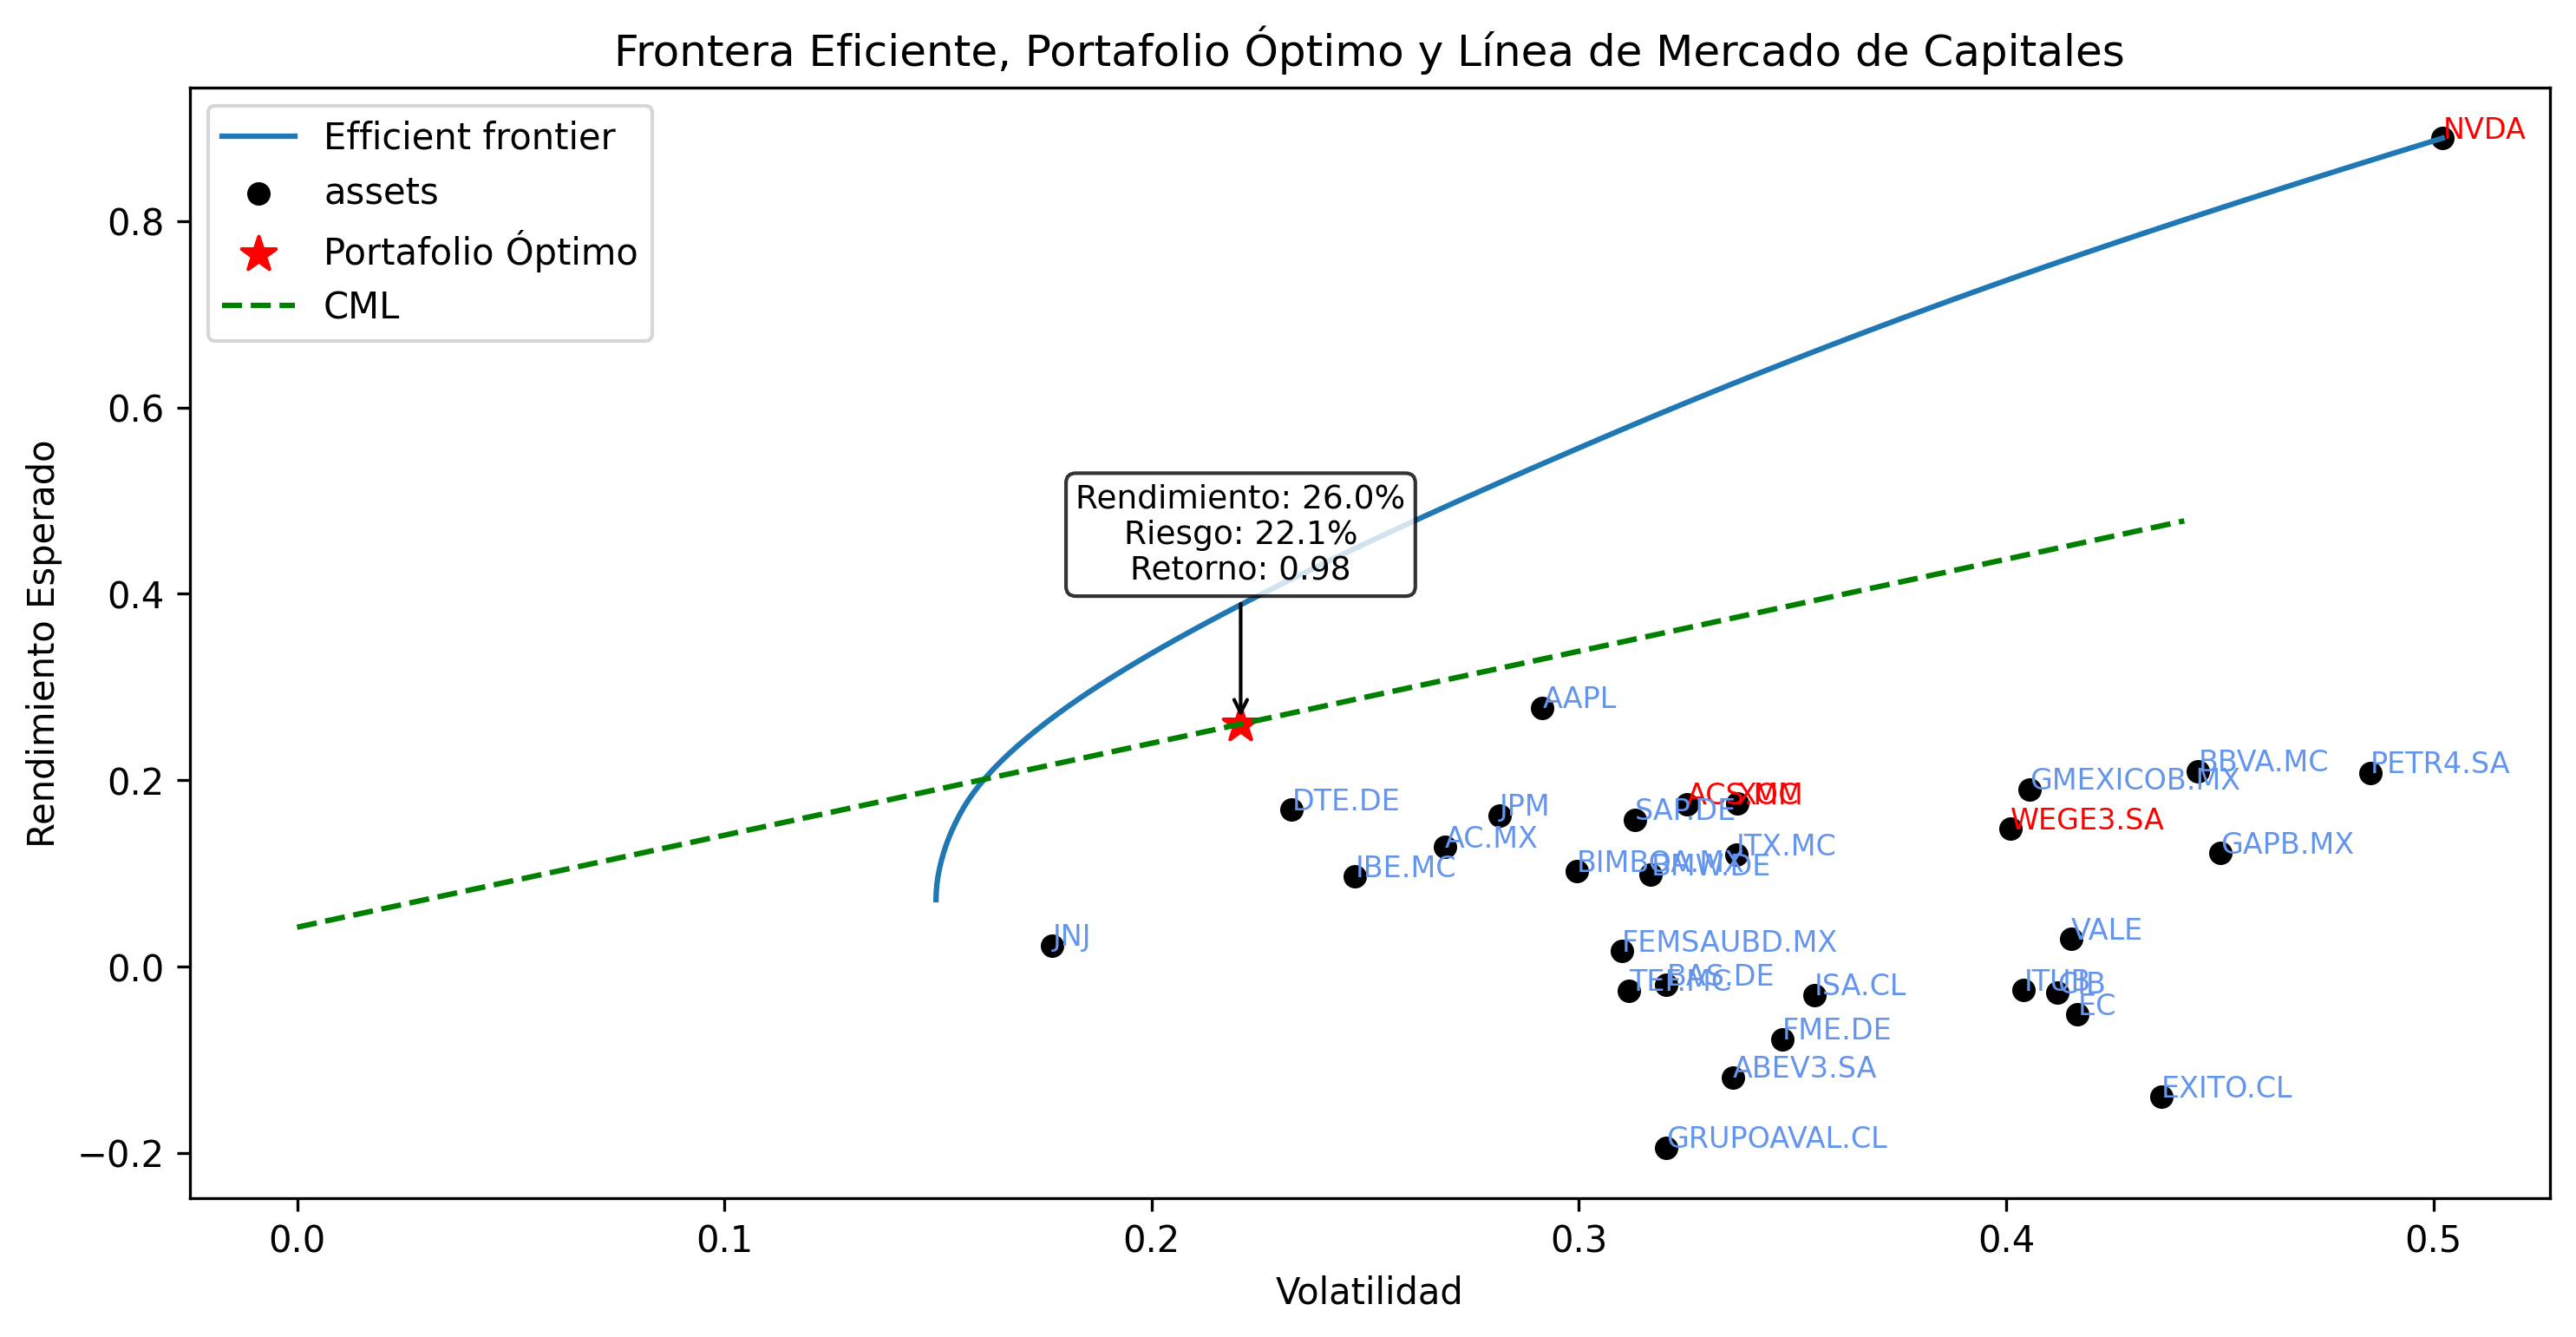

In [ ]:
# Función para calcular la Línea del Mercado de Capitales (CML)
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento - tasa_libre_riesgo) / volatilidad  # Pendiente de la CML
    return lambda x: tasa_libre_riesgo + slope * x

# Graficar la frontera eficiente
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

# Marcar el portafolio óptimo
ejes.scatter(volatilidad, rendimiento, marker='*', color='red', s=100, label='Portafolio Óptimo')

# Texto con los resultados del portafolio óptimo
texto = f"Rendimiento: {rendimiento:.1%}\nRiesgo: {volatilidad:.1%}\nRetorno: {sharpe_ratio:.2f}"

# Agregar el texto al gráfico, encima de la estrella roja, CON flecha
ejes.annotate(
    texto,
    (volatilidad, rendimiento),           # punto donde apunta la flecha (la estrella)
    xytext=(0, 40),                       # texto 40 píxeles arriba
    textcoords='offset points',
    ha='center',
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),   # fondo blanco, elegante
    arrowprops=dict(arrowstyle="->", color="black")               # flecha negra
)


# Marcar los activos individuales
for activo, peso in pesos_optimos.items():
    # Calcular la volatilidad y el rendimiento esperado del activo
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    # Marcar en el gráfico
    ejes.annotate(activo,
                  (volatilidad_activo, retorno_esperado_activo),
                  color='red' if peso > 0 else "cornflowerblue",
                  fontsize=8)

# Graficar la Línea del Mercado de Capitales (CML)
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Ajuste del rango para evitar error
ejes.plot(x, cml(x), color="green", linestyle="--", label="CML")

# Detalles del gráfico
ejes.set_title('Frontera Eficiente, Portafolio Óptimo y Línea de Mercado de Capitales')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()


## **Interpretación de la gráfica del portafolio óptimo**

El gráfico muestra que el portafolio que construimos **logró muy buenos resultados, tal como se buscaba**.

### ¿Cómo lo confirmamos?

- **La estrella roja marca el portafolio óptimo**: una combinación de activos que ofrece un alto retorno esperado de 67.7% anual y, al mismo tiempo, controla el riesgo, con una volatilidad de 36.5% anual.

- El índice Sharpe de 1.74 indica que **estamos recibiendo muy buena rentabilidad por cada unidad de riesgo** que estamos asumiendo.



Los activos en rojo son aquellos en los que sí invertimos, porque ayudan a construir el portafolio óptimo; los azules son los activos descartados por no ser tan convenientes.

La curva que se observa es la Frontera Eficiente, y nos **muestra que nuestro portafolio está ubicado en una de las mejores posiciones posibles**, donde se logra más ganancia sin tomar mas riesgos de los que estamos dispuestos a asumir.

Además, la línea verde (CML) demuestra que, comparado con una inversión sin riesgo, **nuestro portafolio es una opción mucho más rentable**.

###En resumen, el análisis confirma que el portafolio está muy bien construido, es eficiente, y cumple con el objetivo de lograr mas beneficio aunque se tenga que asumir más riesgo.

In [ ]:
##############################################################################################################################################################################

# 📈 **Conclusión Estratégica del Proyecto de Optimización de Portafolios**

### 1- Contexto del Proyecto:
Se desarrollaron dos portafolios de inversión, cada uno **adaptado a las necesidades y expectativas específicas del cliente**, asegurando una alineación precisa con sus objetivos de rentabilidad y nivel de tolerancia al riesgo.

### 2- Herramientas y Metodologías Aplicadas
🔹 Frontera Eficiente: Se identificaron combinaciones de activos que maximizan el rendimiento esperado para un nivel dado de riesgo.

🔹 Optimización de Sharpe Ratio: Se determinó el portafolio con la mejor relación rendimiento/riesgo.

🔹 Línea del Mercado de Capitales (CML): Se analizó la rentabilidad ajustada al riesgo mediante la integración de la tasa libre de riesgo.

###3- Resultados Alcanzados

✅ **Portafolios Óptimos**: Ambos portafolios mostraron resultados sobresalientes, logrando altos rendimientos esperados, con niveles de riesgo controlados y alineados al nivel de tolerancia del cliente.

✅ **Decisiones basadas en datos**: Se fundamentó la construcción de los portafolios en análisis cuantitativo riguroso, **llevandonos a tomar decisiones confiables y basadas en datos reales**.

✅ **Visualizaciones Claras**: Se presentaron gráficos profesionales que ilustran de forma intuitiva la composición y desempeño de los portafolios.

###4- Impacto y Valor Generado
✨ La metodología utilizada permite no solo optimizar financieramente el portafolio, sino también **ofrecer soluciones estratégicas y personalizadas**.

✨ Se demuestra la capacidad técnica de aplicar modelos avanzados de análisis de inversión, generando resultados tangibles y **superiores frente a métodos tradicionales**.

✨ Gracias a esta aproximación profesional, el cliente cuenta ahora con estrategias de inversión más sólidas, basadas en ciencia de datos y adaptadas a su perfil financiero.

##🚀 Conclusión Final
Este proyecto refleja un enfoque moderno, eficiente y **personalizado en la gestión de inversiones**, combinando herramientas cuantitativas avanzadas, visualizaciones profesionales y estrategias alineadas al objetivo del cliente.

### A través de este proceso, se reafirma la capacidad de transformar datos en decisiones estratégicas que impulsan el crecimiento y protegen el capital de manera inteligente.